# Code for reproducing volume and shape plots

In this notebook, the code for reproducing the volume and shape plots of the paper is shown. The helper class `ShapePlotter` is used to plot the graphs within a few predefined standards, making it easier to generate about a hundred different plots. This class is seen in the `shape_plotter.py` file in this repository.

In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from shape_plotter import ShapePlotter

mpl.style.use("./paper.mplstyle")
pd.options.mode.chained_assignment = None

In [2]:
DATA_URL = "https://raw.githubusercontent.com/learningmatter-mit/Zeolite-Phase-Competition/main/data/binding.csv"

df = pd.read_csv(DATA_URL, index_col=0)
splt = ShapePlotter(df)

# Plotting the data

From this part on, the Jupyter notebook plots the OSDAs for the zeolites according to their pore sizes. The OSDAs were pre-selected using a combination of descriptors and human expertise, as described in the paper. The numbering and SMILES of the candidates for repurposing are available in the `osdas.json` file in the repo.

The limits for plotting the zeolite-OSDA pairs for each zeolite were manually selected to show a broad set of meaningful volumes/shapes for all frameworks, whenever possible.

In [3]:
with open("./osdas.json", "r") as f:
    ZEO_OSDAS = json.load(f)

In [4]:
LIMS1 = {
    "6MR": [[50, 300], [-19, 0]],
    "8MR": [[50, 400], [-19, 0]],
    "10MR": [[50, 400], [-19, 0]],
    "12MR": [[50, 560], [-19, 0]],
    "14MR": [[50, 600], [-27, 0]],
}

LIMS2 = {
    "6MR": [[3.5, 14], [3.0, 8.5]],
    "8MR": [[3.5, 16], [3, 9.5]],
    "10MR": [[2, 18], [1, 11]],
    "12MR": [[0, 25], [0, 12]],
    "14MR": [[3, 26], [3, 12]],
}

6MR zeolites


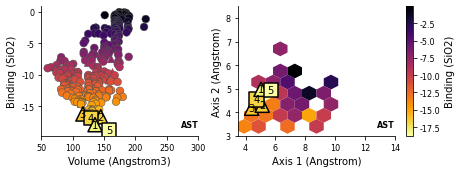

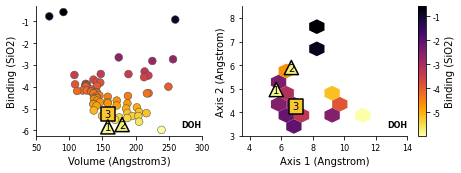

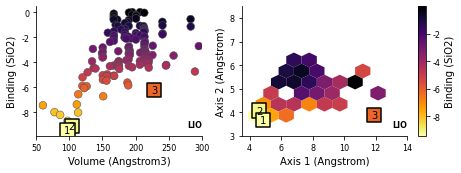

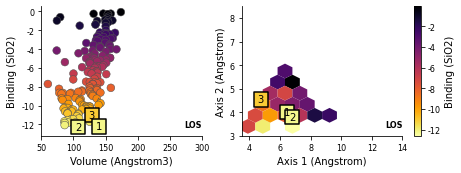

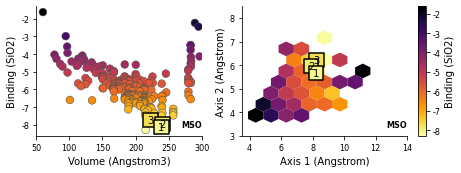

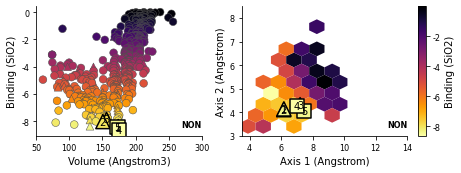

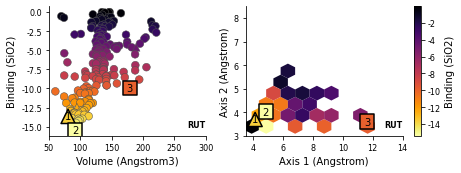

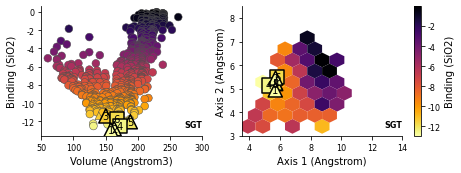

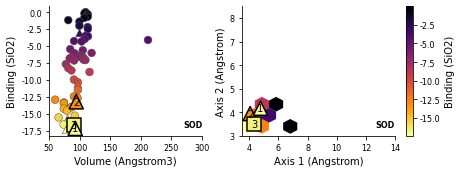

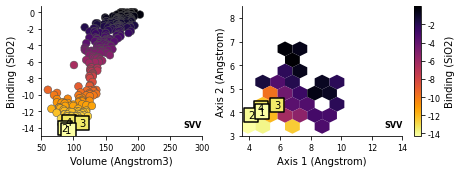

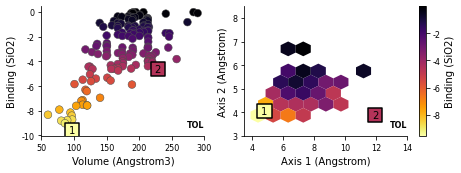

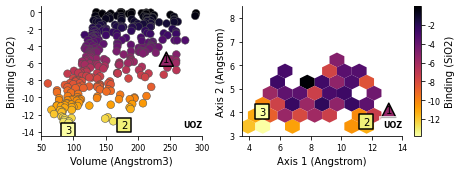

8MR zeolites


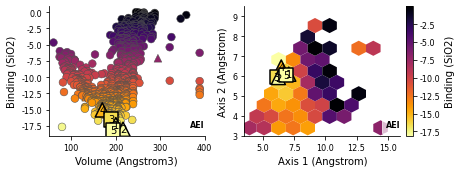

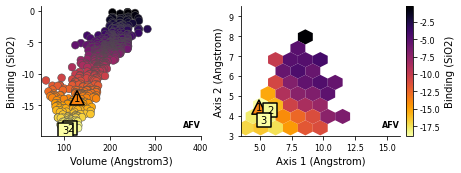

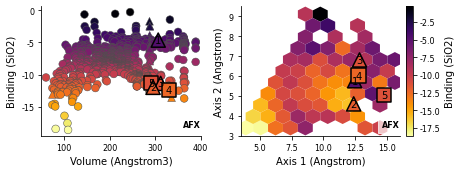

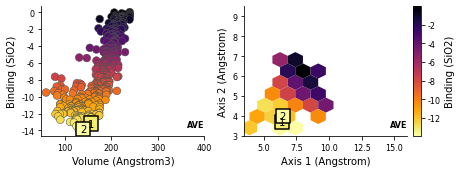

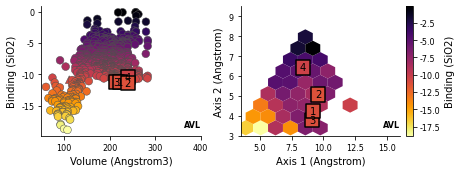

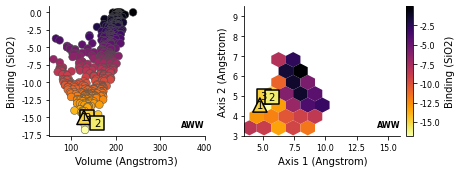

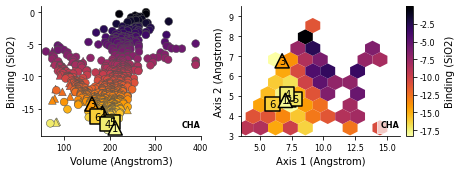

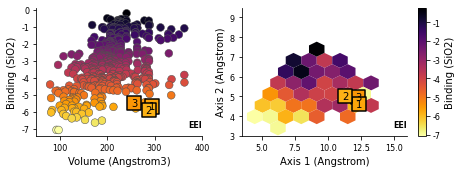

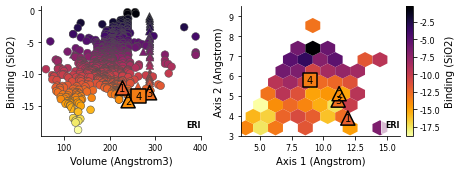

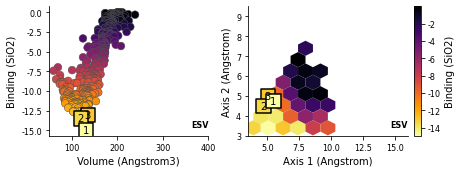

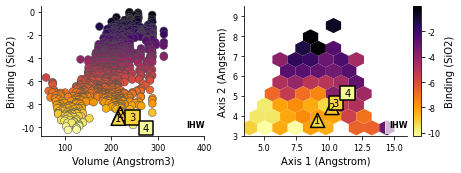

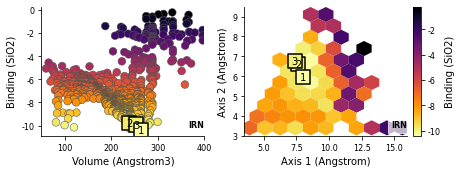

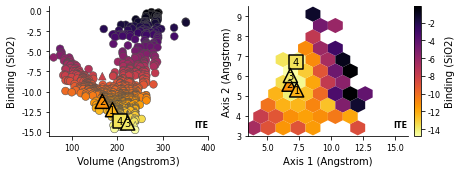

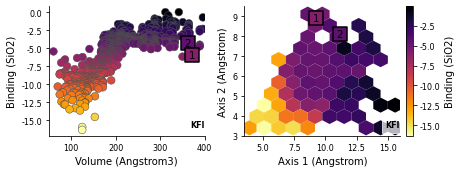

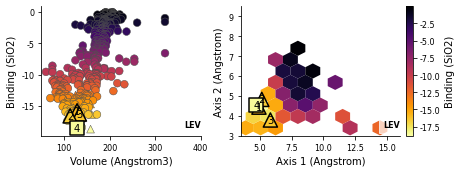

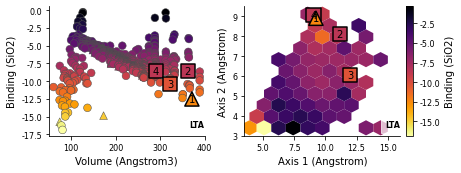

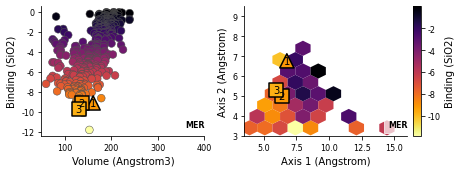

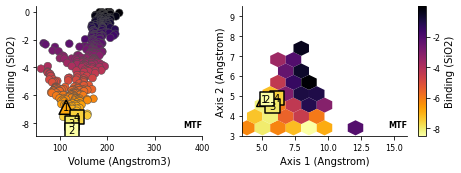

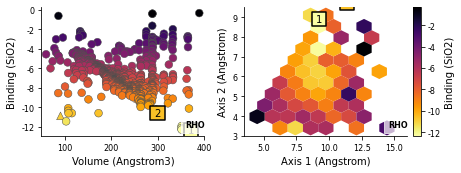

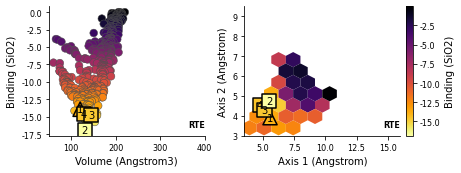

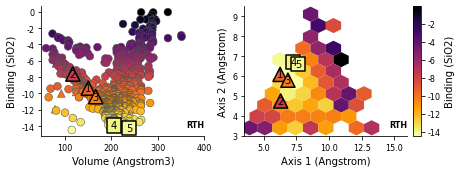

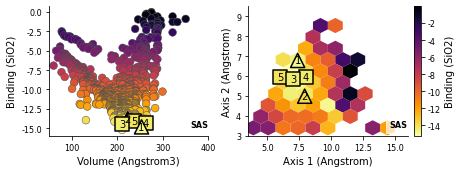

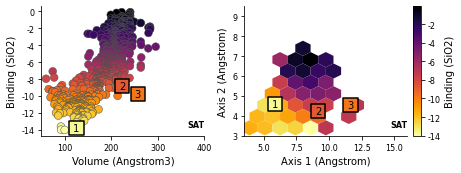

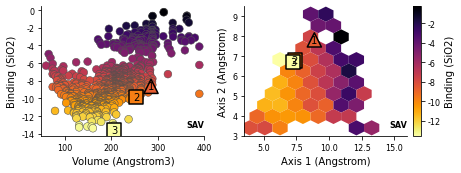

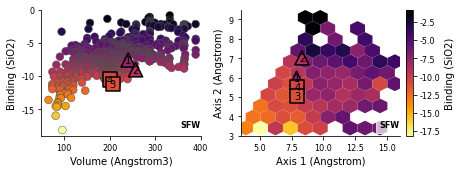

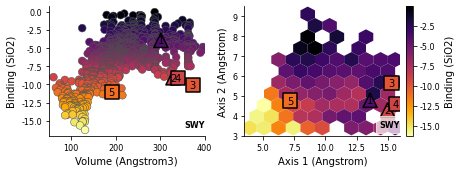

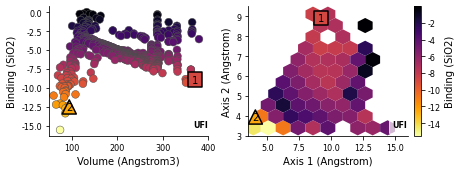

10MR zeolites


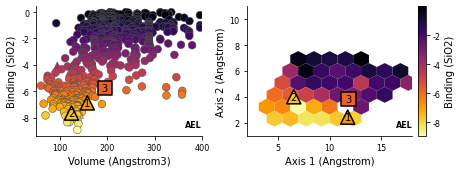

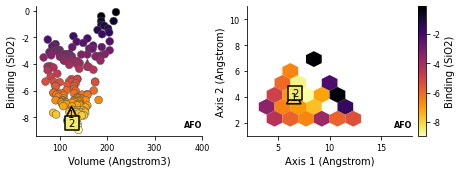

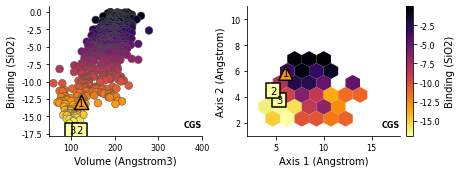

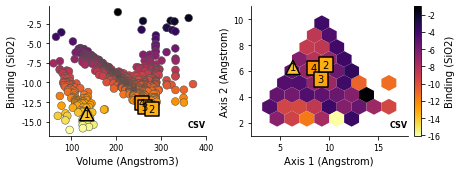

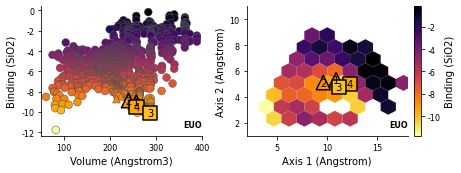

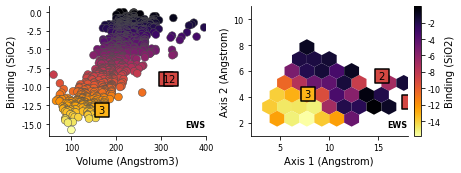

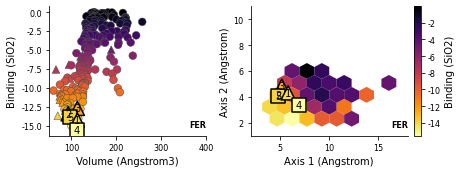

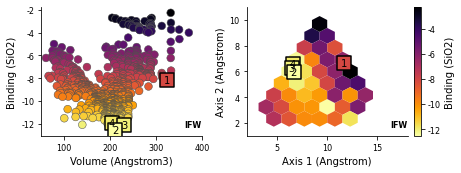

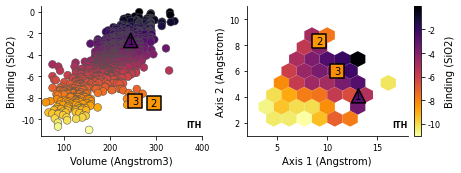

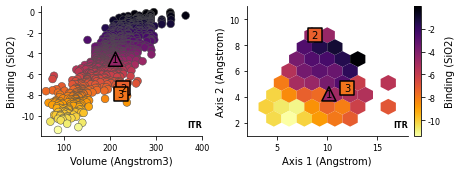

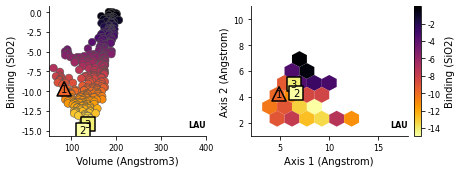

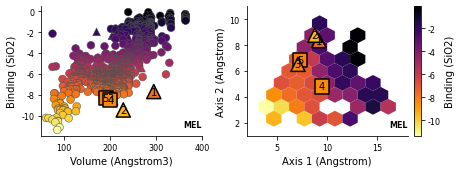

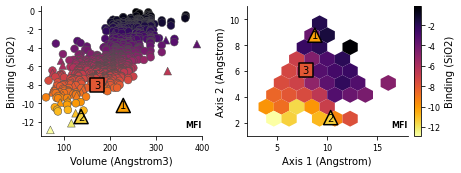

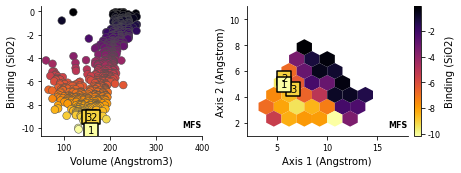

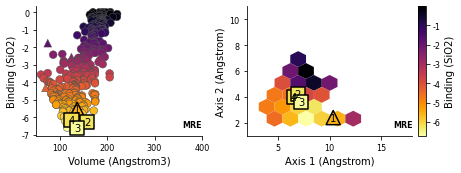

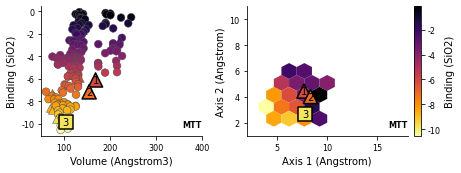

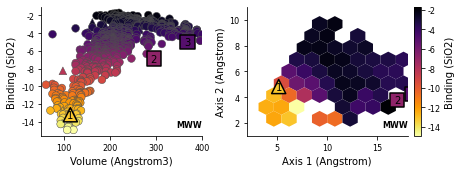

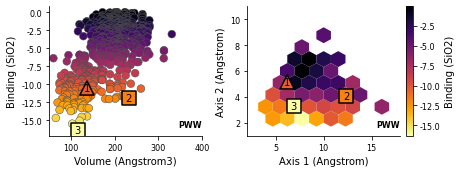

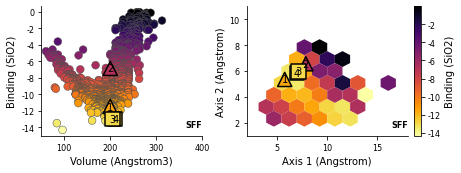

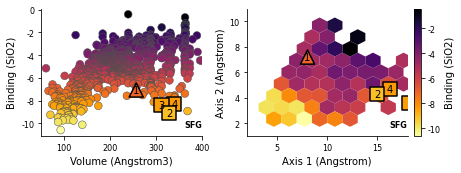

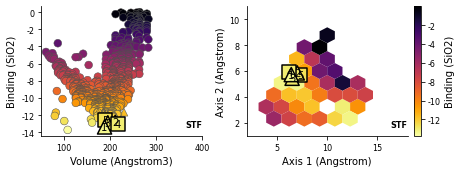

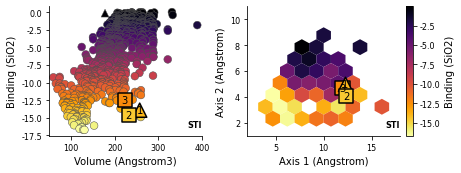

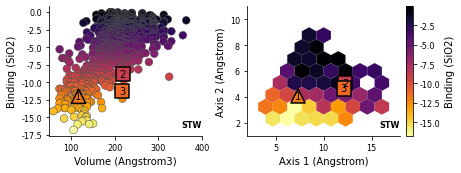

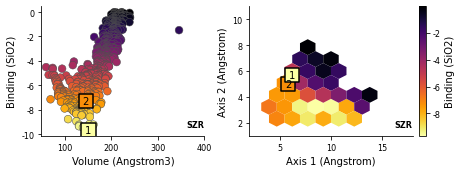

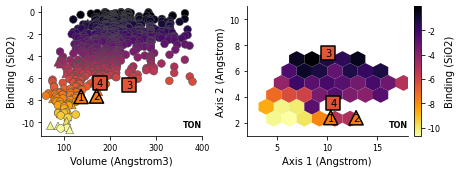

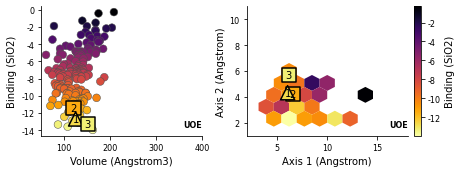

12MR zeolites


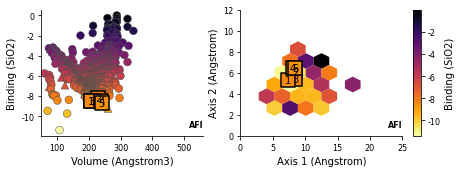

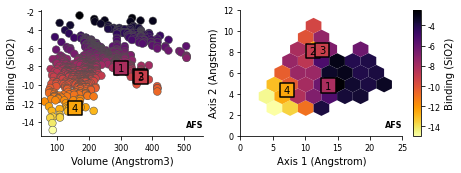

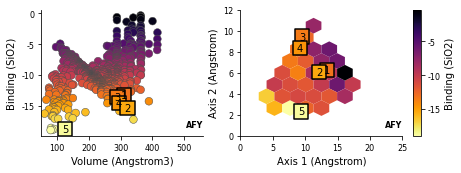

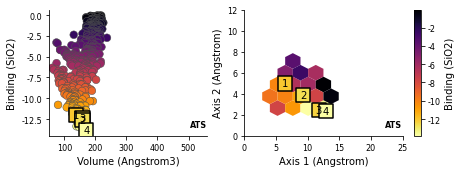

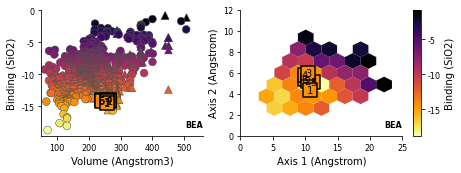

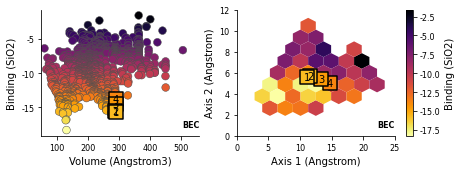

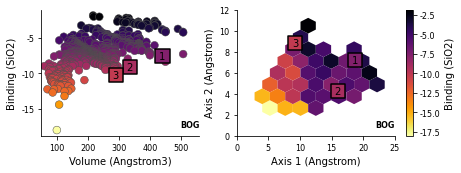

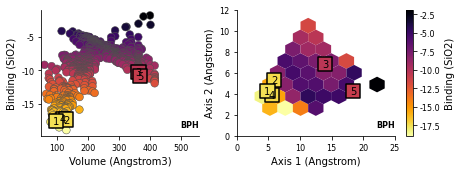

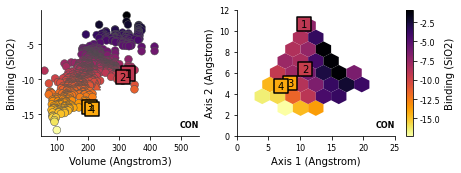

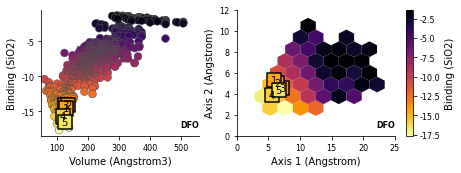

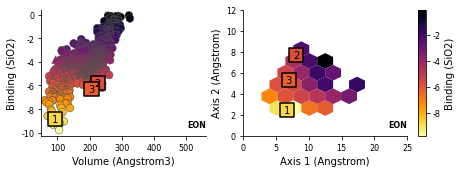

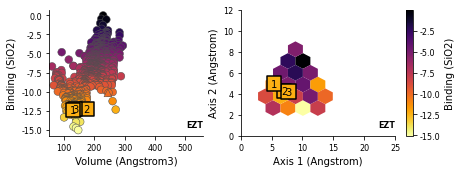

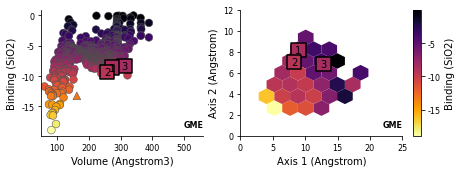

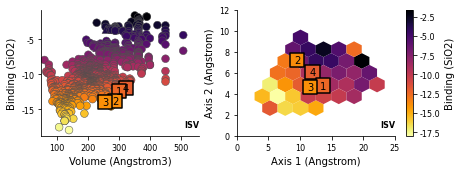

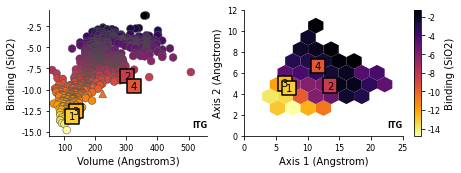

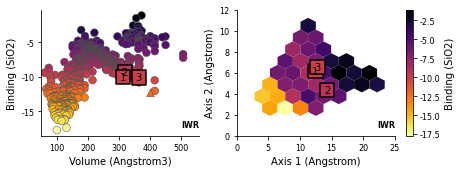

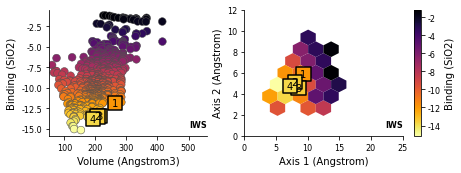

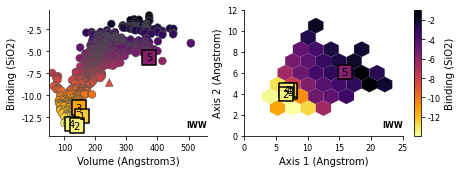

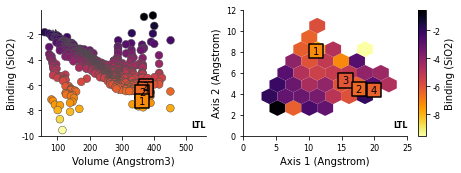

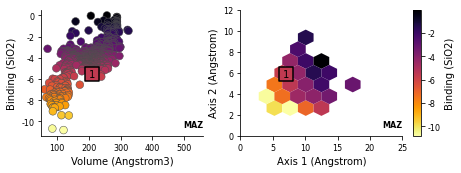

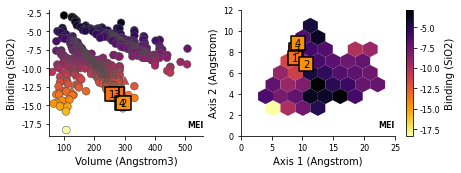

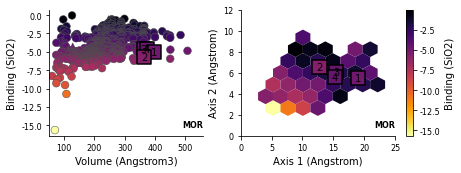

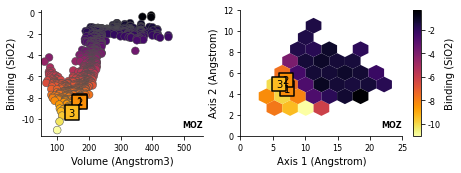

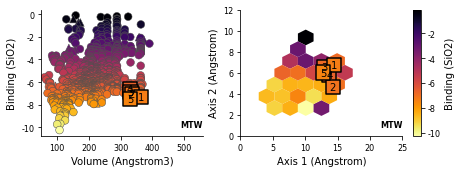

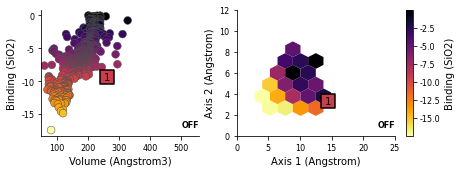

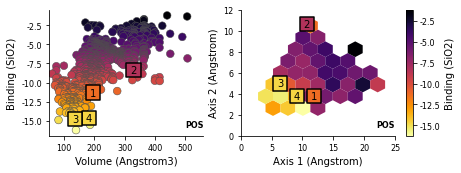

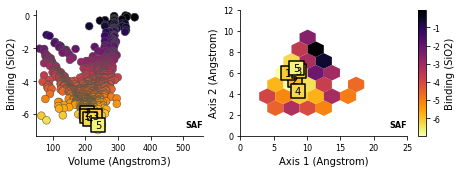

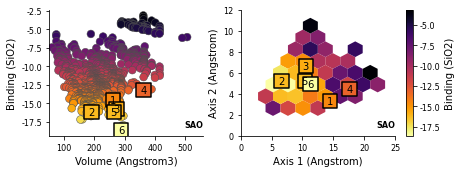

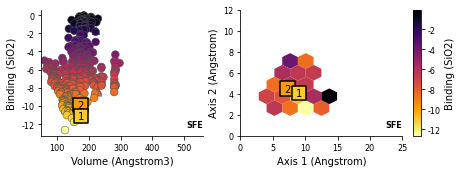

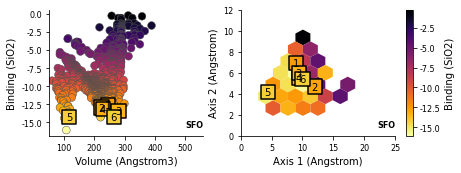

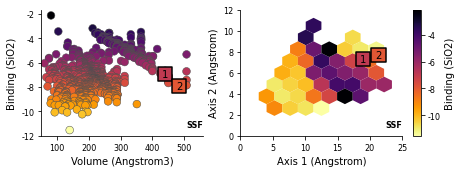

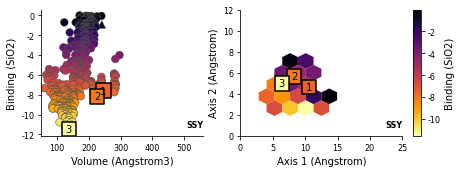

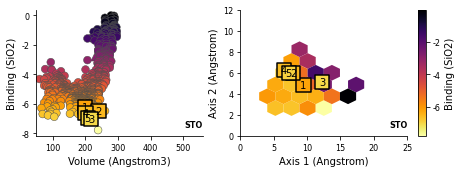

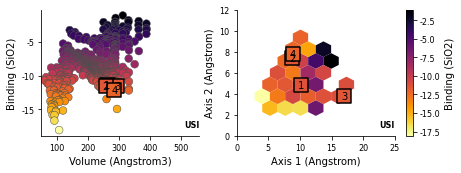

14MR zeolites


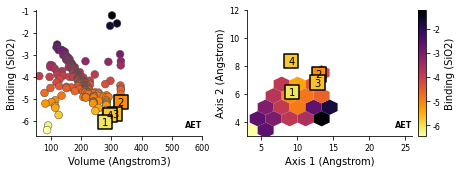

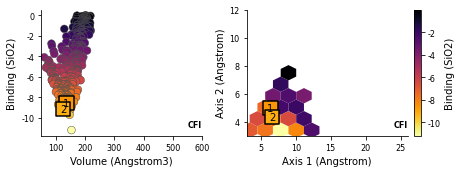

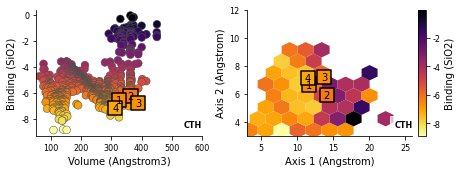

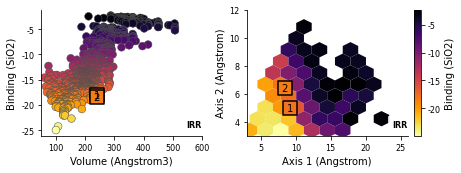

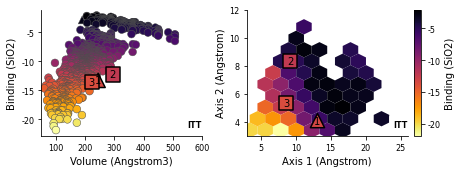

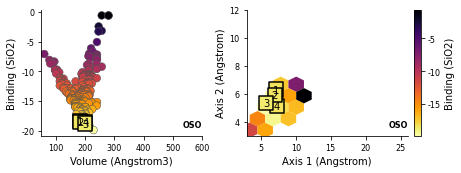

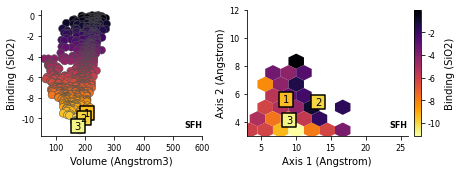

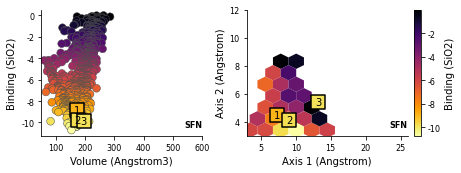

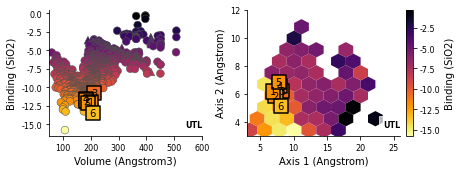

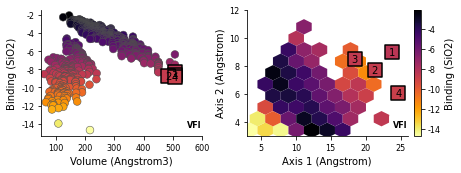

In [5]:
for dim, selected in ZEO_OSDAS.items():
    print(f"{dim} zeolites")
    
    lims1 = LIMS1[dim]
    lims2 = LIMS2[dim]
    
    sort_selected = {k: selected[k] for k in sorted(selected.keys())}
    for zeo, osdas in sort_selected.items():
        fig, ax_fig = splt.plot(zeo, lims1=lims1, lims2=lims2, osdas=osdas)

        for ax in ax_fig[:2]:
            ax.annotate(
                zeo,
                (1.0, 0.07),
                xycoords='axes fraction',
                ha='right',
                fontsize=8,
                fontweight='bold',
                backgroundcolor=(1.0, 1.0, 1.0, 0.7),
            )

        plt.show()

## Dual-OSDA approach

For the dual-OSDA graphs, we emphasize only the three frameworks analyzed and their corresponding OSDAs. The `ShapePlotter` class is created again with a different color option, which emphasizes the competition energy instead of the plain binding.

For this case, we are looking only at cationic OSDAs or the crown ether, as we are interested in producing a high-silica KFI zeolite. Thus, the original dataframe is filtered to remove the non-cationic OSDAs.

In [6]:
df_ = df.loc[
    (df.SMILES.str.contains('+', regex=False))
    | (df.SMILES.str.contains('N', regex=False) & df.SMILES.str.contains('O', regex=False))
]

In [7]:
DUAL_OSDAS = {
    'LTA': {
        'C[N+](C)(C)C': '1',
        'C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2': '3',
    },
    'MER': {
        'CC[N+](CC)(CC)CC': '2',
    },
    'KFI': {
        'CC[N+](CC)(CC)CC': '2',
        'C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2': '3',
    },
}

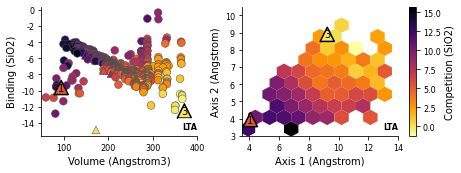

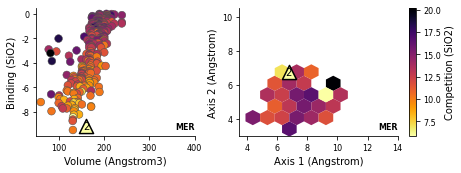

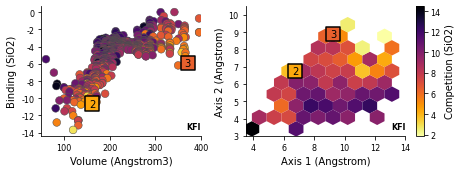

In [8]:
splt = ShapePlotter(
    df_,
    color_option='Competition (SiO2)',
)

lims1 = [[50, 400], [-19, 0]]
lims2 = [[3.5, 14], [3, 10.5]]

for zeolite, osdas in DUAL_OSDAS.items():
    fig, ax_fig = splt.plot(zeolite, lims1=lims1, lims2=lims2, osdas=osdas)
    
    for ax in ax_fig[:2]:
        ax.annotate(
            zeolite,
            (1.0, 0.05),
            xycoords='axes fraction',
            ha='right',
            fontsize=8,
            fontweight='bold',
            backgroundcolor=(1.0, 1.0, 1.0, 0.7),
        )
    
    plt.show()